# Sequential API and Functional API. 
# DeepLearning.AI Specialization: TensorFlow: Advanced Techniques

In [8]:
import tensorflow as tf 
# from tensorflow.python.keras.utils.vis_utils import plot_model 
from tensorflow.keras.utils import plot_model
import pydot 
from tensorflow.keras.models import Model 

In [15]:
# sequential class 
def model_sequential(): 
    
    # instantiate a Sequential class and linearly stack the layers of your model 
    seq_model = tf.keras.models.Sequential([
        
        tf.keras.layers.Flatten(input_shape = (28, 28)),
        tf.keras.layers.Dense(128, activation = tf.nn.relu),
        tf.keras.layers.Dense(10, activation = tf.nn.softmax)
        
    ])
    
    return seq_model

In [16]:
# functional syntax 
def model_functional(): 
    
    # instantiate the input Tensor 
    input_layer = tf.keras.Input(shape = (28, 28))
    
    # stack the layers using the syntax: new_layer()(previous_layer) 
    flatten_layer = tf.keras.layers.Flatten()(input_layer) 
    first_dense = tf.keras.layers.Dense(128, activation = tf.nn.relu)(flatten_layer) 
    output_layer = tf.keras.layers.Dense(10, activation = tf.nn.softmax)(first_dense) 
    
    # declare inputs and outputs 
    func_model = Model(inputs = input_layer, outputs = output_layer) 
    
    return func_model 

In [18]:
# 1. build model with Sequential API 
model1 = model_sequential() 

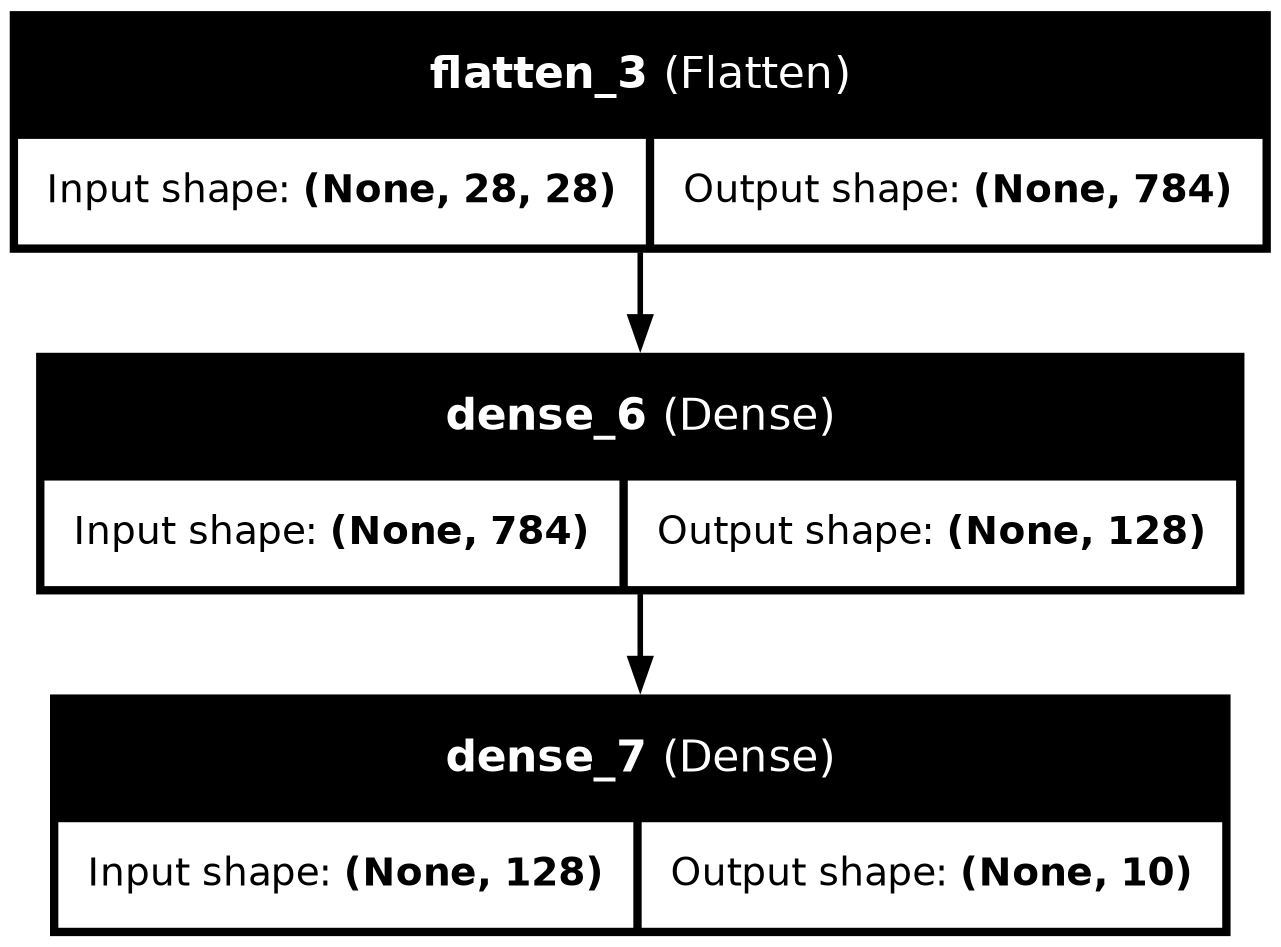

In [19]:
# visualize the model graph 
plot_model(model1, show_shapes = True, show_layer_names = True, to_file = 'model1.png') 

In [20]:
model2 = model_functional()

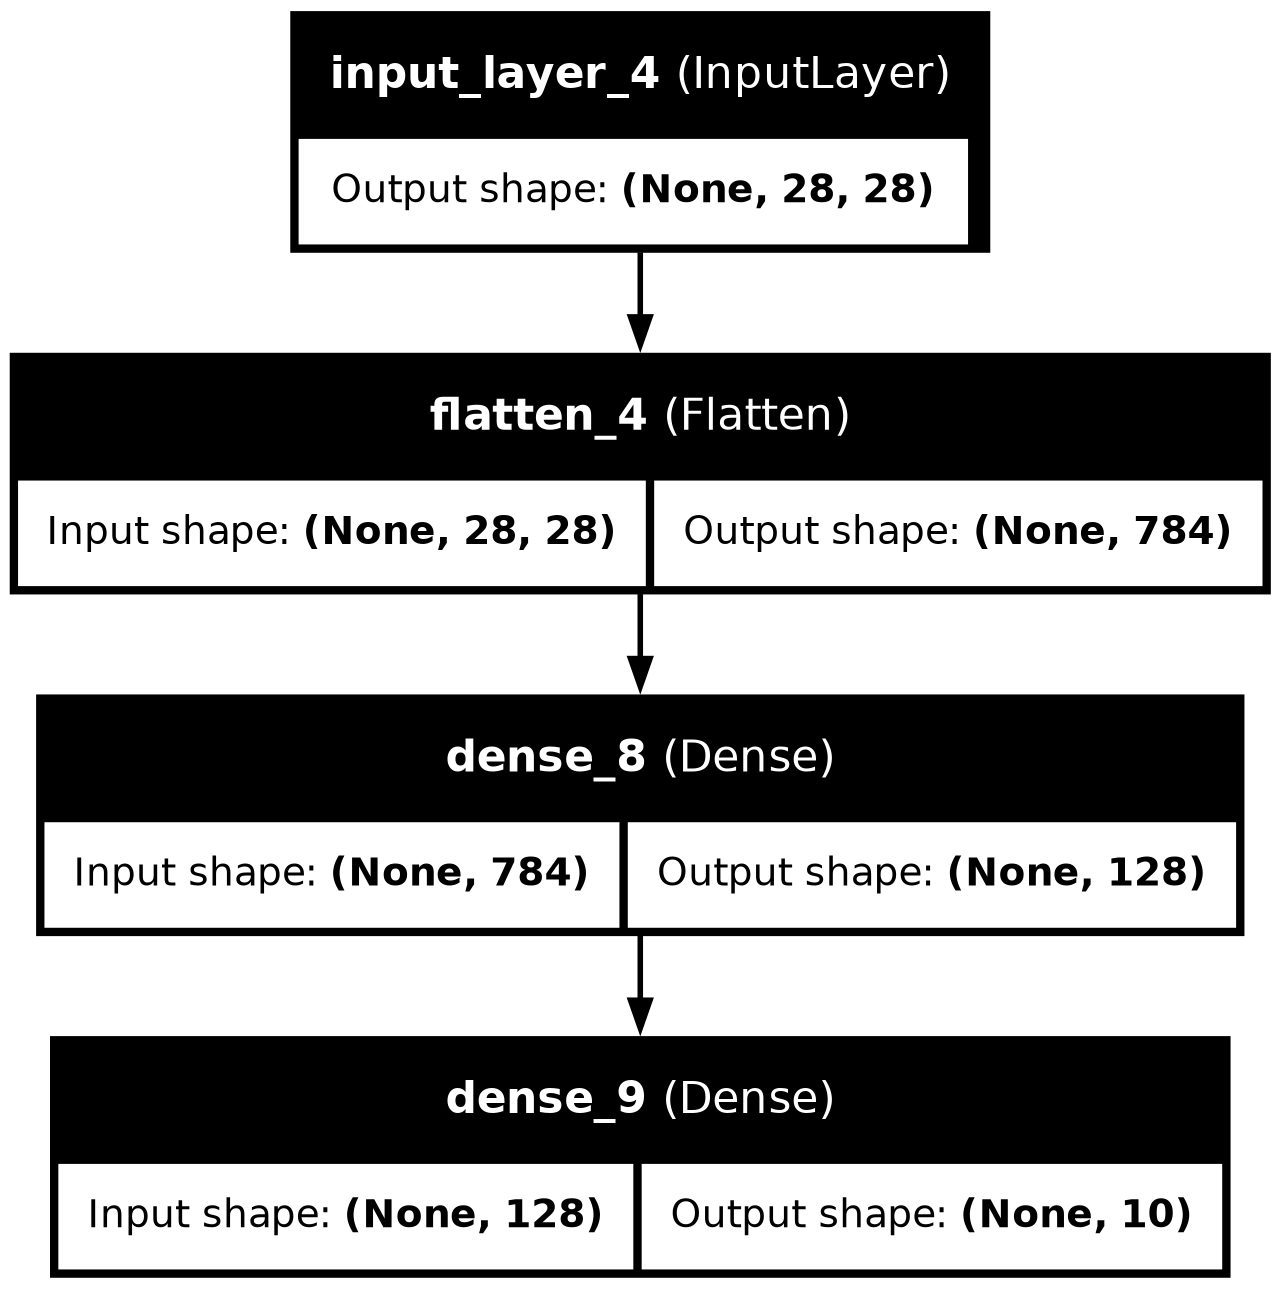

In [25]:
plot_model(model2, show_shapes = True, show_layer_names = True, to_file = 'model2.png')

In [33]:
# prepare the dataset 
mnist = tf.keras.datasets.fashion_mnist 

In [34]:
(training_images, training_labels), (test_images, test_labels) = mnist.load_data() 

In [37]:
training_images, test_images = training_images / 255.0, test_images / 255.0 

In [41]:
# configure, train, and evaluate the model
# compile and train model1 and see what are the results 

model1.compile(optimizer = tf.optimizers.Adam(),
                 loss = 'sparse_categorical_crossentropy',
                 metrics = ['accuracy'])

model1.fit(training_images, training_labels, epochs = 5) 

model1.evaluate(test_images, test_labels) 



Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.7868 - loss: 0.6165
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8615 - loss: 0.3841
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8765 - loss: 0.3410
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8854 - loss: 0.3120
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8909 - loss: 0.2959
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8757 - loss: 0.3453


[0.3480450212955475, 0.8763999938964844]

In [43]:
# compile and train the second model 
model2.compile(optimizer = tf.optimizers.Adam(),
                  loss = 'sparse_categorical_crossentropy',
                  metrics = ['accuracy'])
model2.fit(training_images, training_labels, epochs = 5)

model2.evaluate(test_images, test_labels) 



Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.7828 - loss: 0.6240
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8625 - loss: 0.3806
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8783 - loss: 0.3324
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8866 - loss: 0.3110
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8911 - loss: 0.2921
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8777 - loss: 0.3380


[0.3465450704097748, 0.8751999735832214]

# Conclusion: As we see the accuracy of the model1 and model2 are barely the same, the loss also. 
# We came to conclusion that we can build the same model but during the work we can use both methods (Sequential API and Functional Syntax) to define the model 